Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
# Generate a synthetic dataset with clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

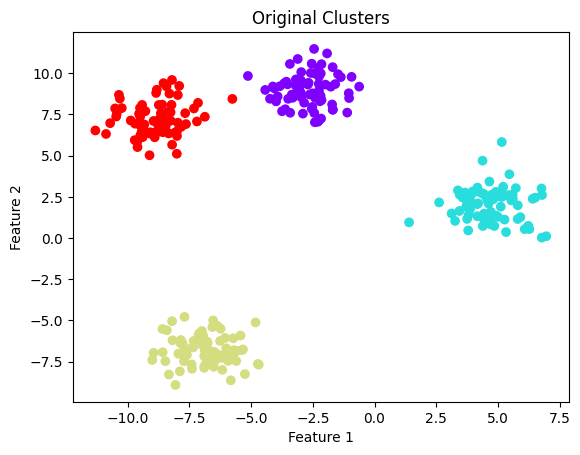

In [3]:
# Visualize the original clusters
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
plt.title("Original Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for n_clusters in range(1, 11):
 kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init=10)
 kmeans.fit(X)
 inertia.append(kmeans.inertia_)

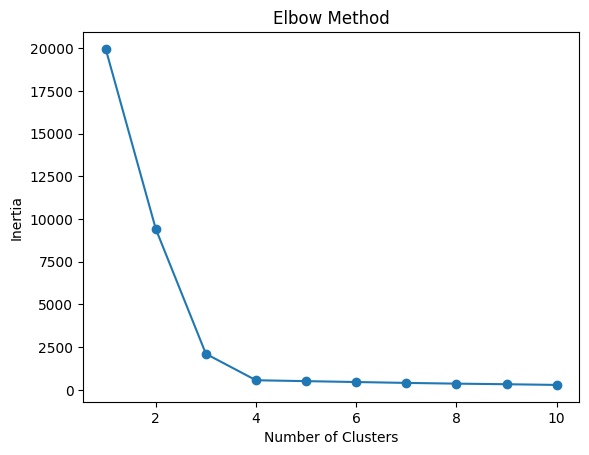

In [6]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [8]:
# Choose the optimal number of clusters and perform clustering
optimal_clusters = 4 # You can choose the optimal number of clusters based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42,n_init=10)
kmeans_labels = kmeans.fit_predict(X)

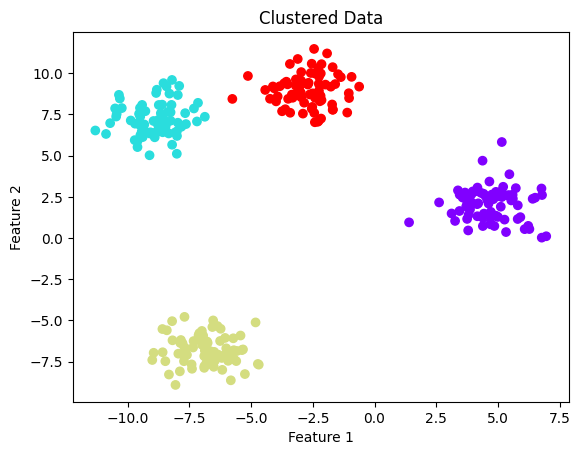

In [10]:
# Visualize the clustered data
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title("Clustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [11]:
# Calculate silhouette score for cluster assessment
silhouette_avg = silhouette_score(X, kmeans_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7915830011443039
